# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data we used for this project was accumulated through 17 campaigns that occurred between May 2008 and November 2010.

In [40]:
import pandas as pd


import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [7]:
df.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective of this task is to create an optimized model that can accurately identify customers who are likely to accept the bank's promotion. From there, our contact center employees can reach out to these customers with a high likelihood of accepting the bank's promotion so as not to waste their time and resources, and bring more business to our bank.

In [8]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

['telephone' 'cellular']


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
columns_to_encode = ['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact']

# Perform ohe on the columns
encoded_df = pd.get_dummies(df, columns=columns_to_encode)


columns_to_binary_encode = ['default', 'contact']


encoded_df



,age,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone
0,56,may,mon,261,1,999,0,nonexistent,1.1,93.994,...,False,False,True,False,False,True,False,False,False,True
1,57,may,mon,149,1,999,0,nonexistent,1.1,93.994,...,False,False,True,False,False,False,True,False,False,True
2,37,may,mon,226,1,999,0,nonexistent,1.1,93.994,...,False,True,True,False,False,True,False,False,False,True
3,40,may,mon,151,1,999,0,nonexistent,1.1,93.994,...,False,False,True,False,False,True,False,False,False,True
4,56,may,mon,307,1,999,0,nonexistent,1.1,93.994,...,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,...,False,True,True,False,False,True,False,False,True,False
41184,46,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,...,False,False,True,False,False,True,False,False,True,False
41185,56,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,...,False,True,True,False,False,True,False,False,True,False
41186,44,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,...,False,False,True,False,False,True,False,False,True,False


In [11]:
binary_map = {'no': 0, 'yes': 1}

# Binary encode the target column
encoded_df['y_encoded'] = encoded_df['y'].map(binary_map)

In [12]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  object 
 2   day_of_week                    41188 non-null  object 
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   poutcome                       41188 non-null  object 
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
bank = encoded_df.iloc[:, 14:]


bank = bank.astype(int)



In [14]:
X = bank.drop(columns=['y_encoded'])
y = bank['y_encoded']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
#calculate proportion of the majority class
majority_class_proportion = encoded_df['y_encoded'].value_counts(normalize=True)[0]

print("Baseline accuracy ('No' class proportion):", majority_class_proportion)

Baseline accuracy ('No' class proportion): 0.8873458288821987


In [16]:
#88.7% of the target variable is 'no'

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
# Initialize the Logistic Regression Classifier
log_reg_classifier = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model and calculate the training time
start_time = time.time()
log_reg_classifier.fit(X_train, y_train)
log_train_time = time.time() - start_time

# Calculate the predictions on the training set
train_predictions = log_reg_classifier.predict(X_train)

# Calculate the accuracy on the training set
log_train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the predictions on the test set
test_predictions = log_reg_classifier.predict(X_test)

# Calculate the accuracy on the test set
log_test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print("Train Time:", log_train_time)
print("Train Accuracy:", log_train_accuracy)
print("Test Accuracy:", log_test_accuracy)

Train Time: 0.4395558834075928
Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
#Accuracy of Logistic Regression model: 0.8865015780529255

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:
bank.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_unknown,loan_yes,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,y_encoded
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize KNN model with desired parameters
knn_model = KNeighborsClassifier(n_neighbors=5)

# Record the start time for training
train_start_time = time.time()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Record the end time for training
train_end_time = time.time()

# Calculate the training time
knn_train_time = train_end_time - train_start_time

# Predict on the training data
y_pred_train = knn_model.predict(X_train.values)

# Calculate training accuracy
knn_train_accuracy = accuracy_score(y_train, y_pred_train)

# Predict on the testing data
y_pred_test = knn_model.predict(X_test)

# Calculate testing accuracy
knn_test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Time:", knn_train_time, "seconds")
print("Train Accuracy:", knn_train_accuracy)
print("Test Accuracy:", knn_test_accuracy)


/Users/blairwhite/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Time: 0.008620023727416992 seconds
Train Accuracy: 0.8829135053110774
Test Accuracy: 0.8799465889779072


In [21]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

#train decision tree
dt_classifier.fit(X_train, y_train)
#calculate time
start_time = time.time()
dt_train_time = time.time() - start_time

#Training set predictions
train_predictions = dt_classifier.predict(X_train)

# Calculate the accuracy on the training set
dt_train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the predictions on the test set
test_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy on the test set
dt_test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print("Train Time:", dt_train_time)
print("Train Accuracy:", dt_train_accuracy)
print("Test Accuracy:", dt_test_accuracy)

Train Time: 2.6941299438476562e-05
Train Accuracy: 0.8914719271623672
Test Accuracy: 0.8816460305899491


In [22]:
# Initialize the SVM Classifier
svm_classifier = SVC()

# Train the SVM model and calculate the training time
start_time = time.time()
svm_classifier.fit(X_train, y_train)
svm_train_time = time.time() - start_time

# Calculate the predictions on the training set
train_predictions = svm_classifier.predict(X_train)

# Calculate the accuracy on the training set
svm_train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the predictions on the test set
test_predictions = svm_classifier.predict(X_test)

# Calculate the accuracy on the test set
svm_test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print("Train Time:", svm_train_time)
print("Train Accuracy:", svm_train_accuracy)
print("Test Accuracy:", svm_test_accuracy)

Train Time: 22.666261911392212
Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


In [23]:
#Create dictionary with model results
data = {
    'Model': ['Log Reg', 'KNN', 'Dec Tree', 'SVM'],
    'Train Time': [log_train_time, knn_train_time, dt_train_time, svm_train_time],
    'Train Accuracy': [log_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [log_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]
}

#Create df from dictionary
final_df = pd.DataFrame(data)


print(final_df)

      Model  Train Time  Train Accuracy  Test Accuracy
0   Log Reg    0.439556        0.887557       0.886502
1       KNN    0.008620        0.882914       0.879947
2  Dec Tree    0.000027        0.891472       0.881646
3       SVM   22.666262        0.887557       0.886502


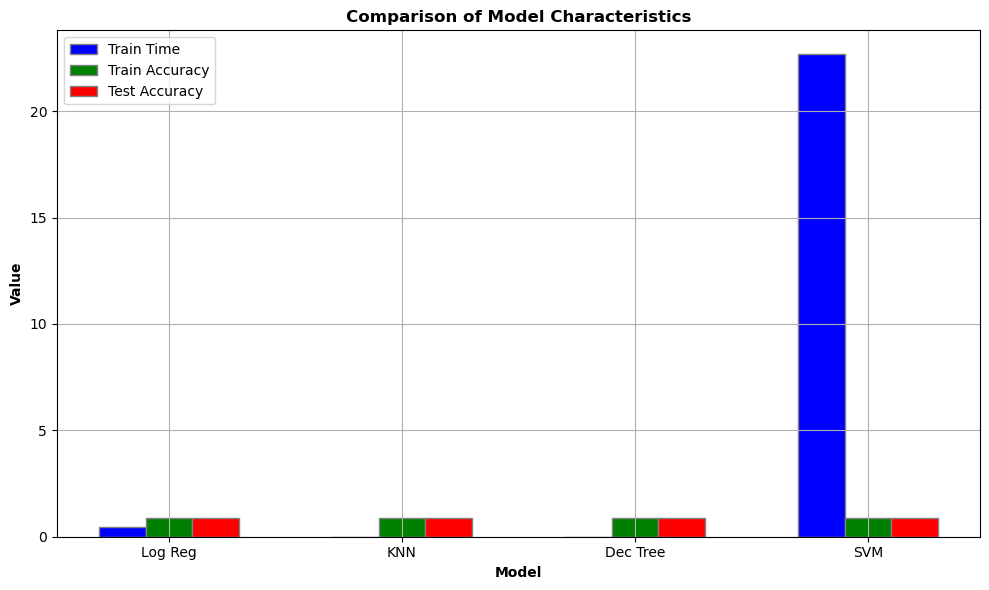

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Log Reg', 'KNN', 'Dec Tree', 'SVM']
train_times = [0.439556, 0.008620, 0.000027, 22.666262]
train_accuracies = [0.887557, 0.882914, 0.891472, 0.887557]
test_accuracies = [0.886502, 0.879947, 0.881646, 0.886502]

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, train_times, color='b', width=bar_width, edgecolor='grey', label='Train Time')
plt.bar(r2, train_accuracies, color='g', width=bar_width, edgecolor='grey', label='Train Accuracy')
plt.bar(r3, test_accuracies, color='r', width=bar_width, edgecolor='grey', label='Test Accuracy')

# Labels and Title
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Value', fontweight='bold')
plt.title('Comparison of Model Characteristics', fontweight='bold')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()



### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

The directions above called to use columns 1-7 in the original dataset to base our evaluation on. Based on this, none of those features were significantly more impactful than the others, and I felt it was best to keep all of them. Below, I will use a grid search to fine tune each model type and select the best parameters. 

In [32]:
# Identify best params for LogReg using GridSearchCV
# Initialize Logistic Regression Classifier
logistic_regression = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'penalty': ['l1', 'l2'],      # Penalty term
    'solver': ['liblinear']       # Optimization algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and accuracy scores
print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


In [38]:

#initialize LogReg with the best parameters
best_logistic_regression = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

# Fit the logistic regression model on the training data
best_logistic_regression.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = best_logistic_regression.predict(X_train)

# Make predictions on the test set
test_predictions = best_logistic_regression.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
log_reg_probs = best_logistic_regression.predict_proba(X_test)[:, 1]

Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


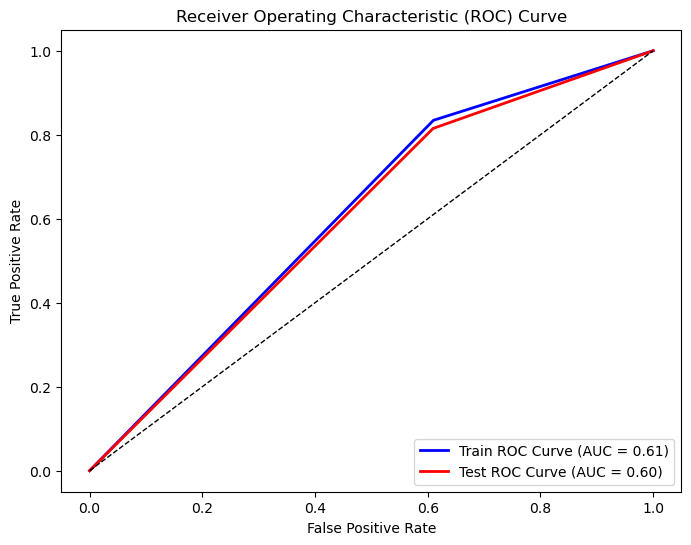

In [41]:
# Obtain predicted probabilities for the positive class ('1') for both training and test sets
train_probs = best_logistic_regression.predict_proba(X_train)[:, 1]
test_probs = best_logistic_regression.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
train_roc_auc = roc_auc_score(y_train, train_probs)

# Compute ROC curve and ROC area for test set
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_roc_auc = roc_auc_score(y_test, test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC Curve (AUC = {train_roc_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='red', lw=2, label=f'Test ROC Curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Identify best params for KNN using GridSearchCV
# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],    # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and accuracy scores
print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Train Accuracy: 0.8845827010622155
Test Accuracy: 0.8839524156348628


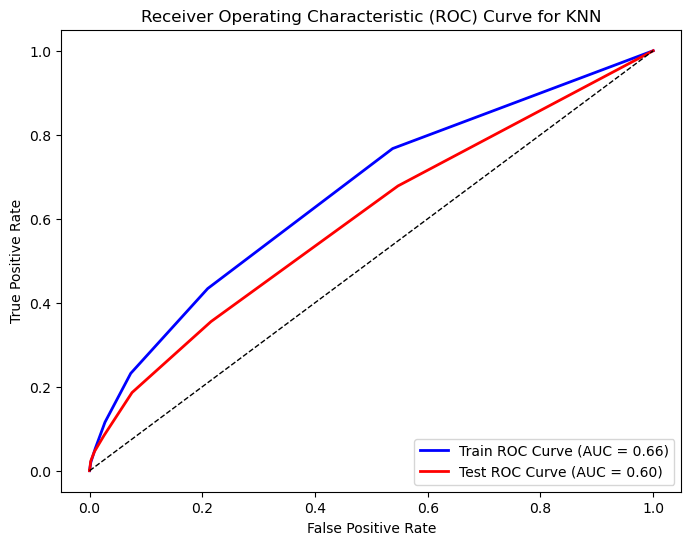

In [42]:
# Initialize KNN classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')

# Fit the KNN model to the training data
best_knn.fit(X_train, y_train)

# Obtain predicted probabilities for the positive class ('1') for both training and test sets
train_probs_knn = best_knn.predict_proba(X_train)[:, 1]
test_probs_knn = best_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
train_fpr_knn, train_tpr_knn, _ = roc_curve(y_train, train_probs_knn)
train_roc_auc_knn = roc_auc_score(y_train, train_probs_knn)

# Compute ROC curve and ROC area for test set
test_fpr_knn, test_tpr_knn, _ = roc_curve(y_test, test_probs_knn)
test_roc_auc_knn = roc_auc_score(y_test, test_probs_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_knn, train_tpr_knn, color='blue', lw=2, label=f'Train ROC Curve (AUC = {train_roc_auc_knn:.2f})')
plt.plot(test_fpr_knn, test_tpr_knn, color='red', lw=2, label=f'Test ROC Curve (AUC = {test_roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Identify best params for DT Classifier using GridSearchCV
# Initialize DT Classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and accuracy scores
print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.887587253414264
Test Accuracy: 0.8865015780529255


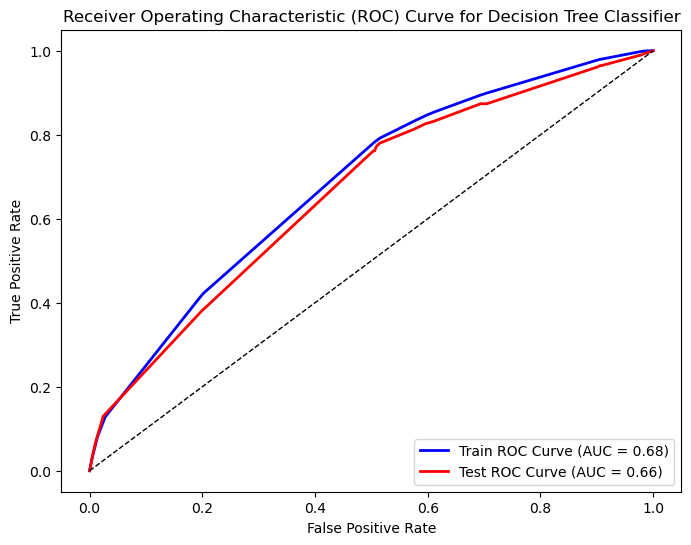

In [43]:
# Initialize Decision Tree Classifier with the best parameters
best_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2)

# Fit the Decision Tree model to the training data
best_decision_tree.fit(X_train, y_train)

# Obtain predicted probabilities for the positive class ('1') for both training and test sets
train_probs_dt = best_decision_tree.predict_proba(X_train)[:, 1]
test_probs_dt = best_decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
train_fpr_dt, train_tpr_dt, _ = roc_curve(y_train, train_probs_dt)
train_roc_auc_dt = roc_auc_score(y_train, train_probs_dt)

# Compute ROC curve and ROC area for test set
test_fpr_dt, test_tpr_dt, _ = roc_curve(y_test, test_probs_dt)
test_roc_auc_dt = roc_auc_score(y_test, test_probs_dt)

# Plot ROC curve for Decision Tree Classifier
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_dt, train_tpr_dt, color='blue', lw=2, label=f'Train ROC Curve (AUC = {train_roc_auc_dt:.2f})')
plt.plot(test_fpr_dt, test_tpr_dt, color='red', lw=2, label=f'Test ROC Curve (AUC = {test_roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [29]:
# Identify best params for SVM using GridSearchCV
#SVM Classifier
svm_classifier = SVC()

#hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto']      # Kernel coefficient for 'rbf'
}

#GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
train_predictions = best_estimator.predict(X_train)
test_predictions = best_estimator.predict(X_test)

# Calculate accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and accuracy scores
print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


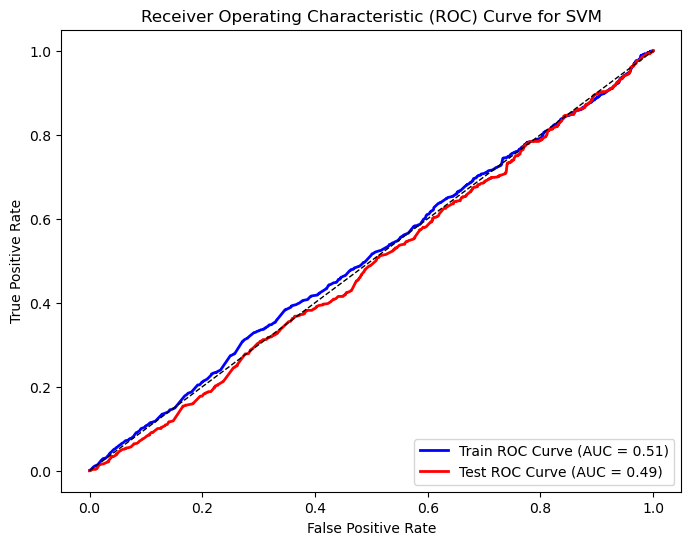

In [44]:
# Initialize SVM classifier with the best parameters
best_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True)

# Fit the SVM model to the training data
best_svm.fit(X_train, y_train)

# Obtain decision function scores for the positive class ('1') for both training and test sets
train_scores_svm = best_svm.decision_function(X_train)
test_scores_svm = best_svm.decision_function(X_test)

# Compute ROC curve and ROC area for training set
train_fpr_svm, train_tpr_svm, _ = roc_curve(y_train, train_scores_svm)
train_roc_auc_svm = roc_auc_score(y_train, train_scores_svm)

# Compute ROC curve and ROC area for test set
test_fpr_svm, test_tpr_svm, _ = roc_curve(y_test, test_scores_svm)
test_roc_auc_svm = roc_auc_score(y_test, test_scores_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_svm, train_tpr_svm, color='blue', lw=2, label=f'Train ROC Curve (AUC = {train_roc_auc_svm:.2f})')
plt.plot(test_fpr_svm, test_tpr_svm, color='red', lw=2, label=f'Test ROC Curve (AUC = {test_roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()

FINDINGS: After fine tuning each model type with GridSearchCV, I concluded that a Decision Tree Classifier was the best model type for this project. A decision tree model provided a high accuracy score, that was similar to the other models, and also had a very low fit time. What stood out to me about the Decision Tree Classifier was that it had the highest AUC for both the test and training sets. I thought it was important to consider accuracy and AUC scores because it struck a balance between overall corectness and the model's ability to rank instances effectively. High accuracy ensures that the majority of predictions are correct, while a high AUC score indicates that the model is good at separating positive and negative instances, reducing the likelihood of contacting false positives. This approach helps optimize the efficiency and effectiveness of our bank's promotional efforts while minimizing call center resource wastage.

NEXT STEPS: After coming to the conclusions above, I would recommend running a Decision Tree Classifier on potential new customers databases. This model type will identify customers that are likely to accept our account promotion. From there, we can have our call centers reach out to them and propose our promotion. Following these steps will bring new business to our bank and minimize the resources to do so. 

##### Questions